<h1>Heart Disease Dataset EDA</h1>

<h3>This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.</h3>
<p>    1-age <br>
        2-sex   1- male , 0 -female<br> 
        3-chest pain type (4 values) <br>
        4-resting blood pressure <br>
        5-serum cholestoral in mg/dl <br>
        6-fasting blood sugar > 120 mg/dl <br>
        7-resting electrocardiographic results (values 0,1,2) <br>
        8-maximum heart rate achieved  <br>
        9-exercise induced angina <br>
        10-oldpeak = ST depression induced by exercise relative to rest <br>
        11-the slope of the peak exercise ST segment <br>
        12-number of major vessels (0-3) colored by flourosopy <br>
        13-thal: 0 = normal; 1 = fixed defect; 2 = reversable defect <br>
        The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.<br>
</p>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Importing and printing data set</h3>

In [29]:
def importData(data):
    df = pd.read_csv(data)
    return df

def  print_all(data):
    print(data.info())
    print(data.shape)

df = importData("heart.csv")
print_all(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
(1025, 14)


<h3>Summing Null Values</h3> 

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


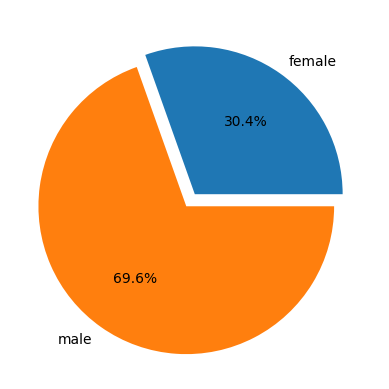

In [92]:
explode = (0,0.1)
plt.pie(df.groupby("sex")["age"].count(),labels=("female","male"),  explode=explode,autopct='%1.1f%%');

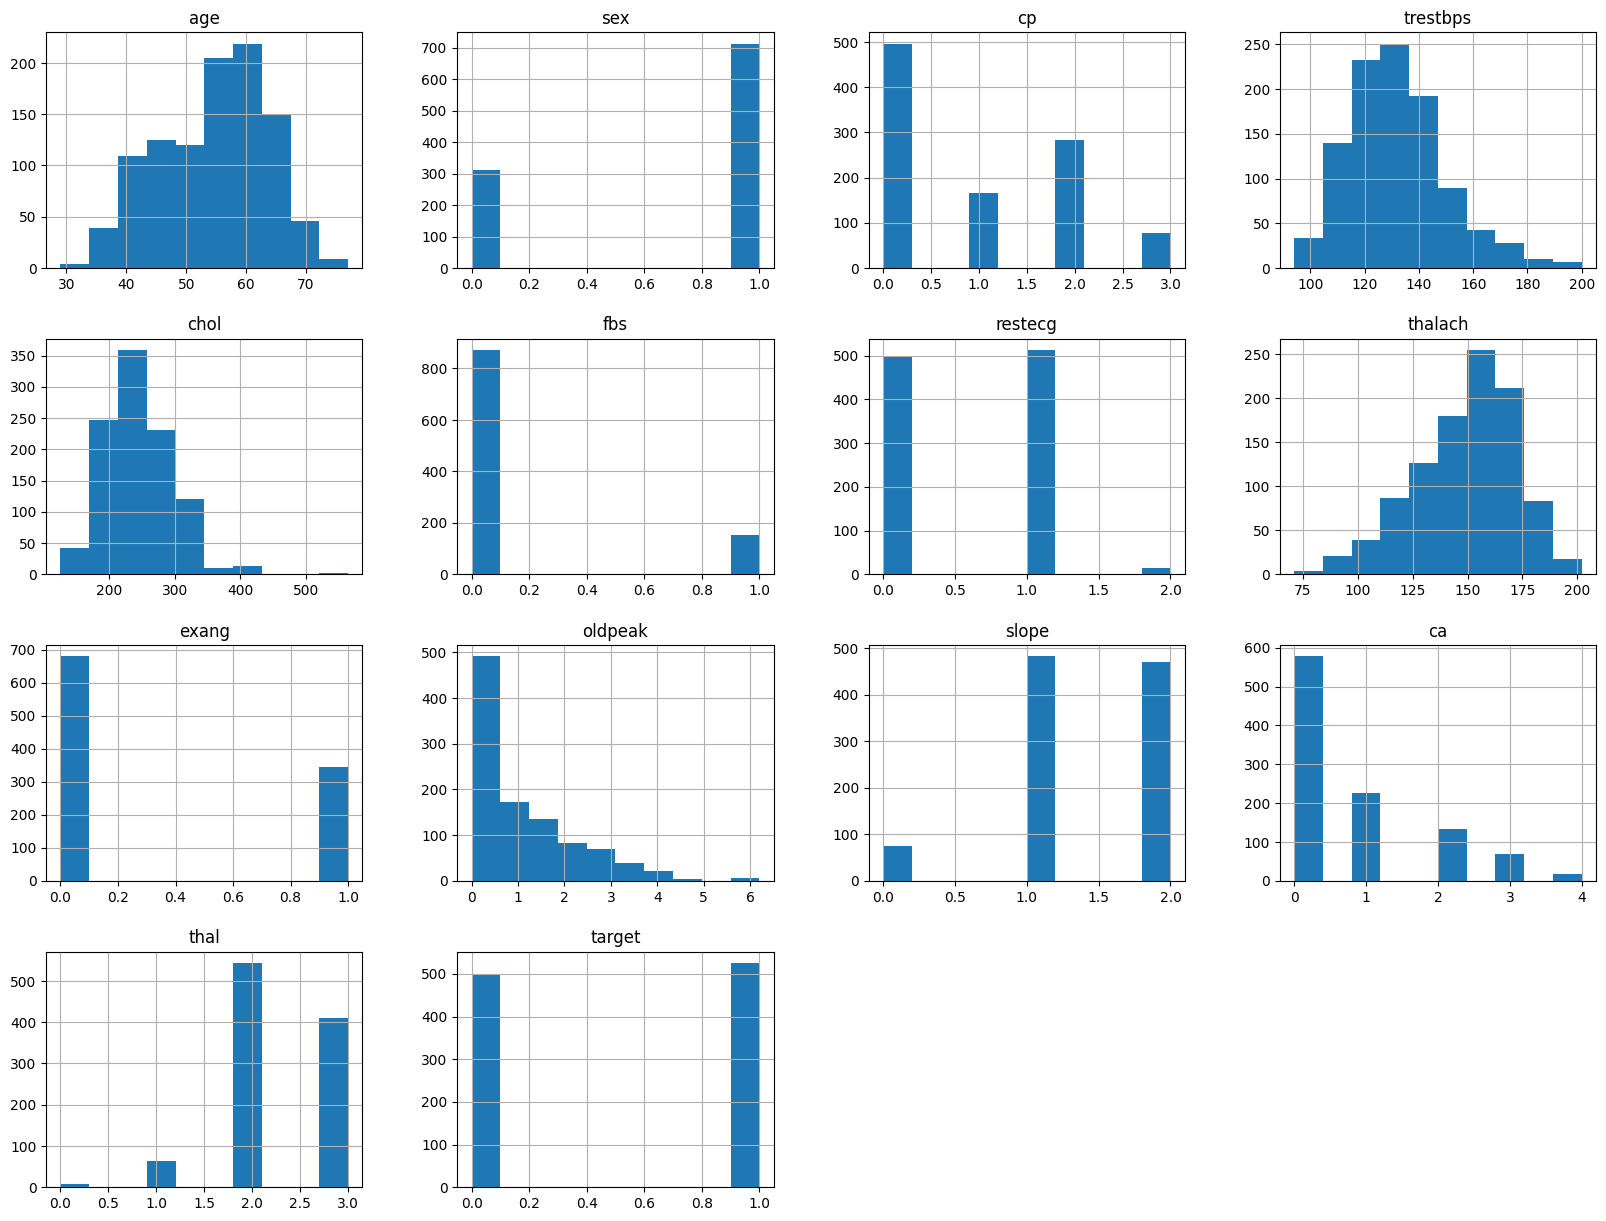

In [34]:
df.hist(figsize=(20,15));

<p>As we can see most of the patience is male and the age is between 40-60 years old.</p>

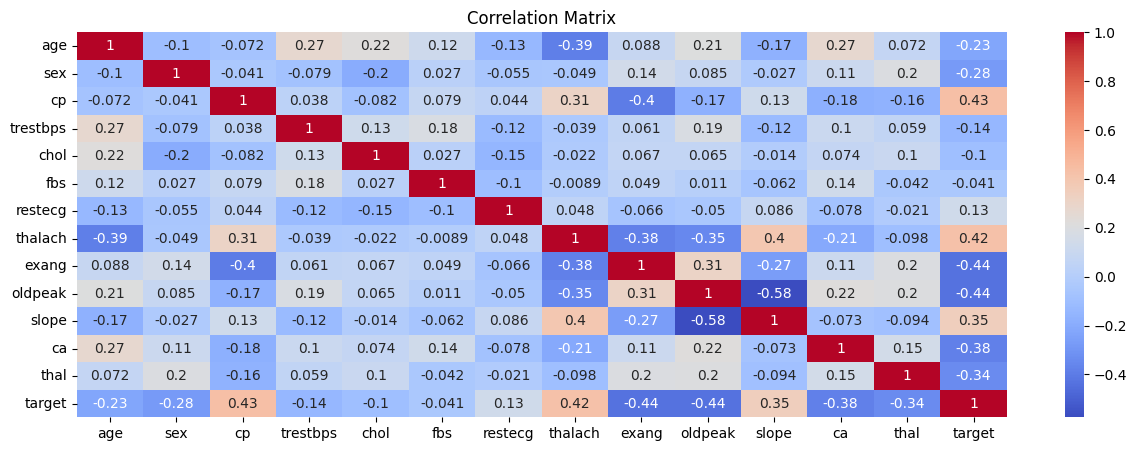

In [42]:
corr_matrix = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<p>As we can see there isn't much correaltion between columns. </p>

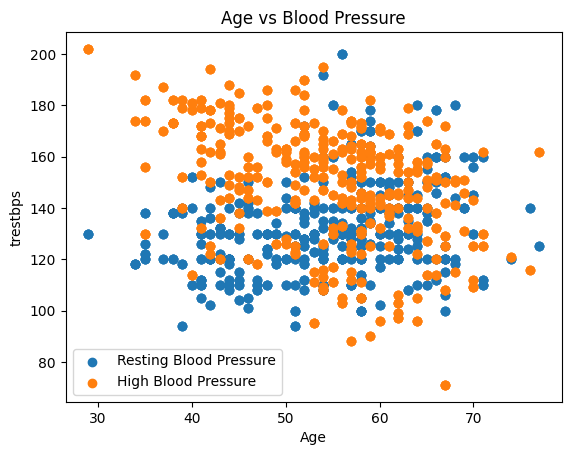

In [73]:
plt.scatter(df['age'], df['trestbps'])
plt.scatter(df['age'], df['thalach'])
plt.title('Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('trestbps')
plt.legend(labels=("Resting Blood Pressure" ,"High Blood Pressure"),loc="lower left")
plt.show()

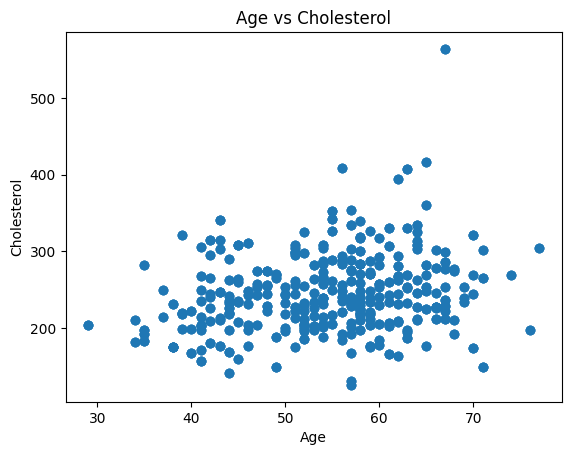

In [74]:
plt.scatter(df['age'], df['chol'])
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

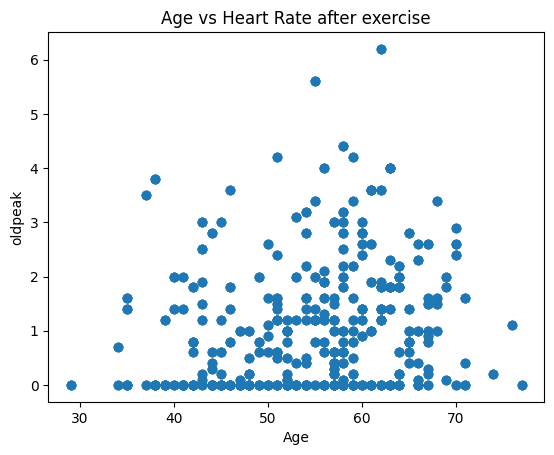

In [75]:
plt.scatter(df['age'], df['oldpeak'])
plt.title('Age vs Heart Rate after exercise')
plt.xlabel('Age')
plt.ylabel('oldpeak')
plt.show()

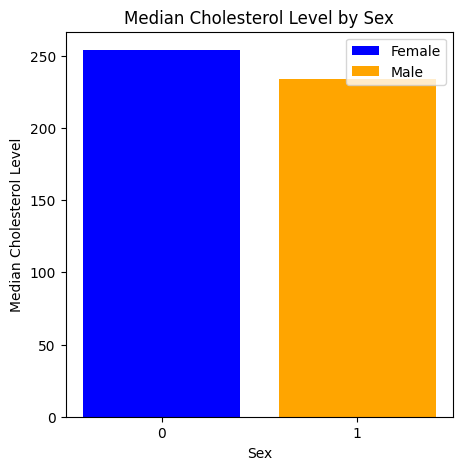

In [129]:
grouped_oldpeak_sex= df.groupby("sex")['chol'].median()
colors = ["blue" if sex == 0 else "orange" for sex in grouped_oldpeak_sex.index]
plt.figure(figsize=(5,5))
for i, sex in enumerate(grouped_oldpeak_sex.index):
    plt.bar(str(sex), grouped_oldpeak_sex[sex], color=colors[i], label='Male' if sex == 1 else 'Female')
plt.xlabel('Sex')
plt.ylabel('Median Cholesterol Level')
plt.title('Median Cholesterol Level by Sex')
plt.legend(labels=(["Female","Male"]),loc="upper right")
plt.show();